# Scalling & Normalization

Common 3 Types:
- Standard Scaler: use standard deviation and mean to suits
- MinMax Scaler: use input mix and max value [0-1], as boundaries of normalization
- Robust Scaler: use median. don't cause outliers



---



##### Dataset

In [ ]:
import pandas as pd

In [ ]:
names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
           'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
           'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', names=names, thousands=r',')

In [ ]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470




---



##### Dataset Preprocessing

In [ ]:
df = df.replace(['?'], pd.NA)

In [ ]:
df = df.dropna(axis=0)

In [ ]:
categorial_cols = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 
                   'num-of-cylinders', 'fuel-system']

In [ ]:
for col_name in categorial_cols:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [ ]:
df = df.drop('symboling', axis=1)

In [ ]:
X = df.iloc[:, :-1]

In [ ]:
Y = df.iloc[:, -1]



---



##### Data Visualization - Before Scaling

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

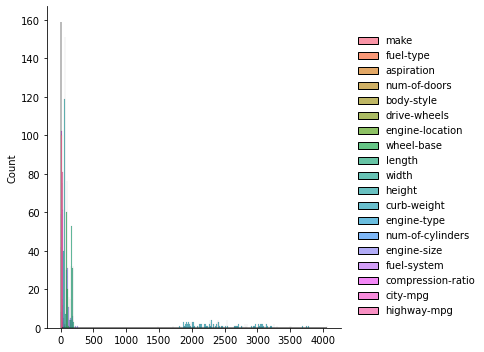

In [ ]:
sns.displot(X)
plt.show()



---



##### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
standardScaledX = scaler.fit_transform(X)

In [ ]:
standardScaledX

array([[ 1.20622213, -2.03264726,  0.32274861, ...,  0.83173287,
        -0.41494538, -0.3233128 ],
       [ 1.20622213, -2.03264726,  0.32274861, ...,  0.83173287,
        -1.40212216, -1.56577168],
       [ 1.03739351, -2.03264726,  0.32274861, ...,  0.83173287,
        -1.23759269, -1.0998496 ],
       ...,
       [-0.73530707,  1.38417211,  0.32274861, ...,  0.83173287,
        -1.40212216, -1.41046432],
       [-0.73530707,  1.38417211, -3.09838668, ..., -0.67595229,
        -0.08588645, -0.78923488],
       [-0.73530707,  1.38417211,  0.32274861, ...,  0.61634928,
        -1.23759269, -1.0998496 ]])

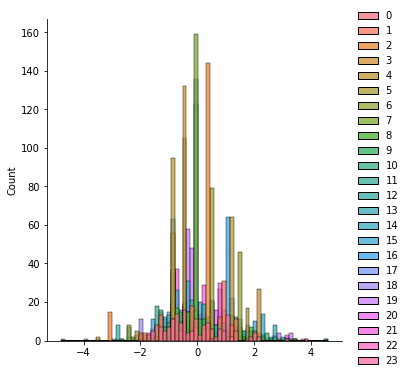

In [ ]:
sns.displot(standardScaledX)
plt.show()

**Normalized with Same Data Distribution**



---



##### MixMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
mixMaxScaledX = scaler.fit_transform(X)

In [ ]:
mixMaxScaledX

array([[0.51832461, 0.        , 1.        , ..., 0.55102041, 0.26470588,
        0.33333333],
       [0.51832461, 0.        , 1.        , ..., 0.55102041, 0.08823529,
        0.11111111],
       [0.48691099, 0.        , 1.        , ..., 0.55102041, 0.11764706,
        0.19444444],
       ...,
       [0.15706806, 1.        , 1.        , ..., 0.55102041, 0.08823529,
        0.13888889],
       [0.15706806, 1.        , 0.        , ..., 0.26530612, 0.32352941,
        0.25      ],
       [0.15706806, 1.        , 1.        , ..., 0.51020408, 0.11764706,
        0.19444444]])

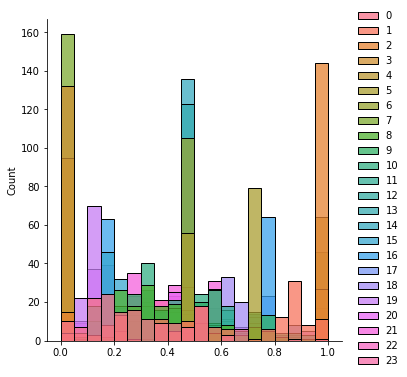

In [ ]:
sns.displot(mixMaxScaledX)
plt.show()



---



##### Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robustScaledX = scaler.fit_transform(X)

In [ ]:
robustScaledX

array([[ 0.94444444, -1.11111111,  0.        , ...,  0.42857143,
        -0.25      , -0.22222222],
       [ 0.94444444, -1.11111111,  0.        , ...,  0.42857143,
        -1.        , -1.11111111],
       [ 0.83333333, -1.11111111,  0.        , ...,  0.42857143,
        -0.875     , -0.77777778],
       ...,
       [-0.33333333,  0.77777778,  0.        , ...,  0.42857143,
        -1.        , -1.        ],
       [-0.33333333,  0.77777778, -1.        , ..., -0.57142857,
         0.        , -0.55555556],
       [-0.33333333,  0.77777778,  0.        , ...,  0.28571429,
        -0.875     , -0.77777778]])

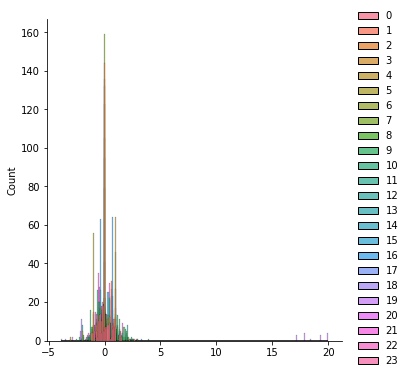

In [ ]:
sns.displot(robustScaledX)
plt.show()



---



# Scaling on subset of features

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
l = [X['width'], X['length'], X['height']]
robustScaledSubsetX = scaler.fit_transform(l)

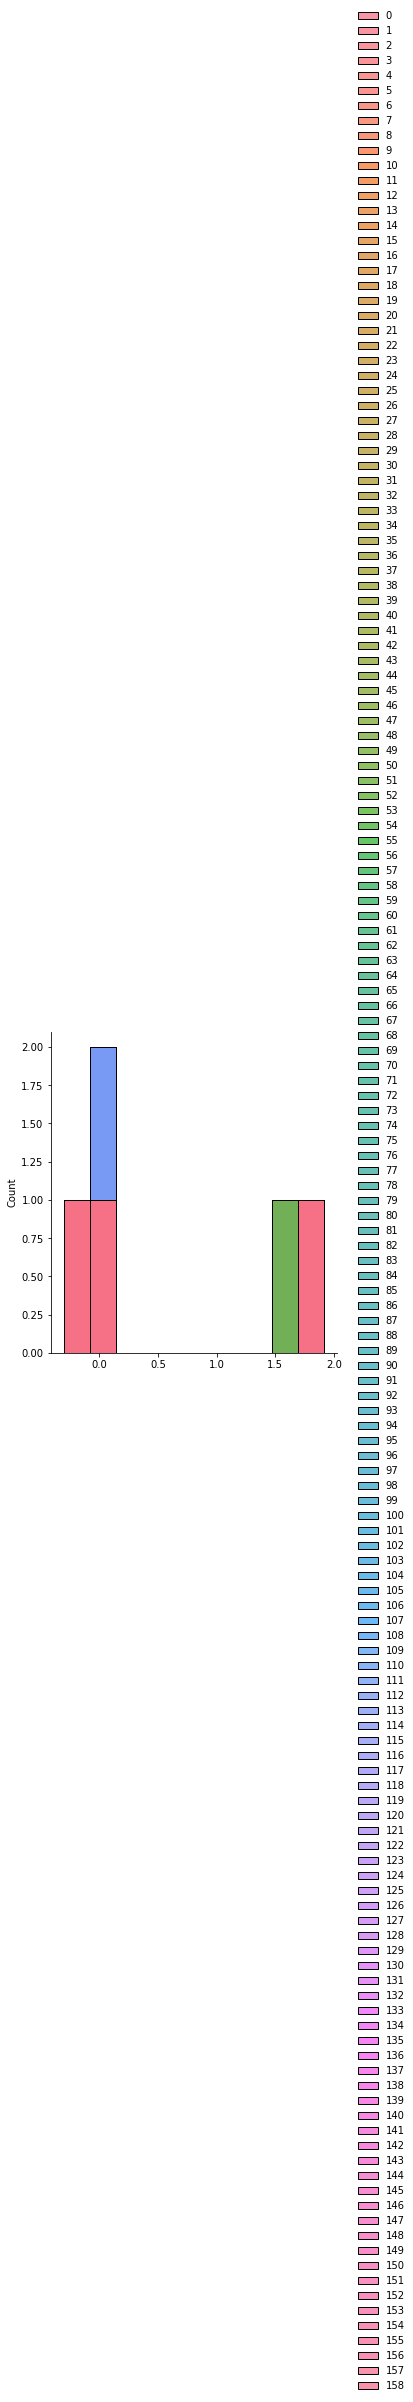

In [ ]:
sns.displot(robustScaledSubsetX)
plt.show()